<a href="https://colab.research.google.com/github/sanjanabontha/SKMLI-175-TASKS/blob/main/Phase4(MiniProject).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

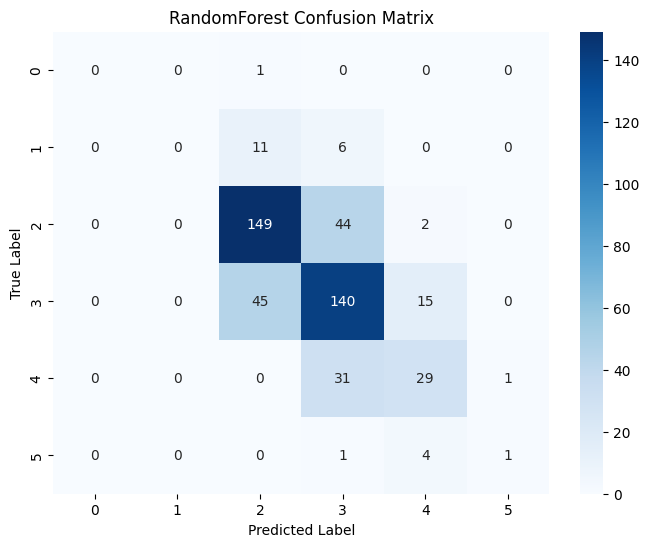


SVM Model:
Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        17
           5       0.64      0.78      0.71       195
           6       0.57      0.60      0.59       200
           7       0.59      0.28      0.38        61
           8       1.00      0.00      0.00         6

    accuracy                           0.61       480
   macro avg       0.80      0.28      0.28       480
weighted avg       0.62      0.61      0.58       480



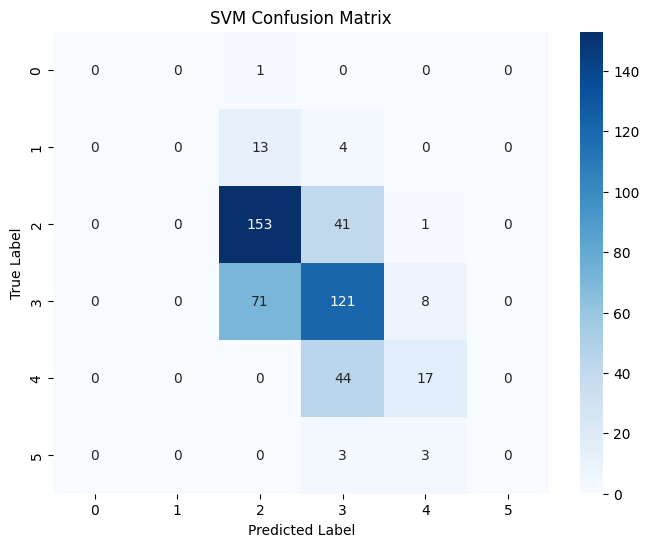


LogisticRegression Model:
Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        17
           5       0.62      0.75      0.68       195
           6       0.53      0.55      0.54       200
           7       0.42      0.26      0.32        61
           8       1.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.76      0.26      0.26       480
weighted avg       0.58      0.56      0.54       480



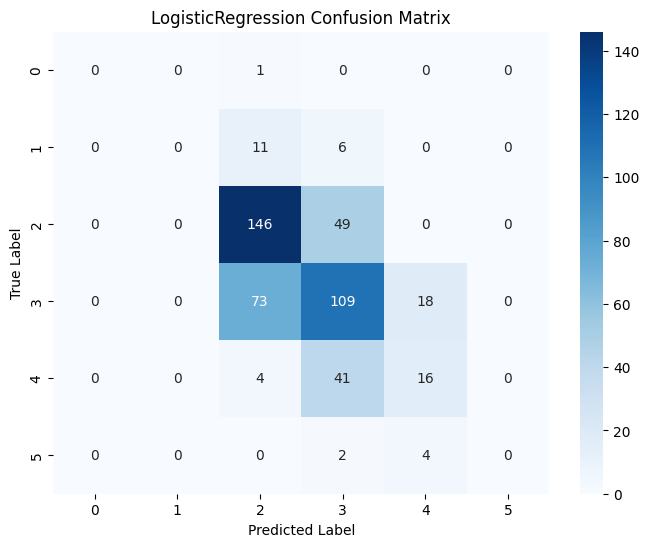

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, delimiter=';')

# Display first few rows of the dataframe
print(data.head())

# Define features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'\n{name} Model:')
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
